<a href="https://colab.research.google.com/github/Ayakhaled200/ML-Models/blob/main/Clustring/kmean_Hierarchical_Clustering/Kmean_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Kmean

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the datasets

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Genre'] = label_encoder.fit_transform(df['Genre'])

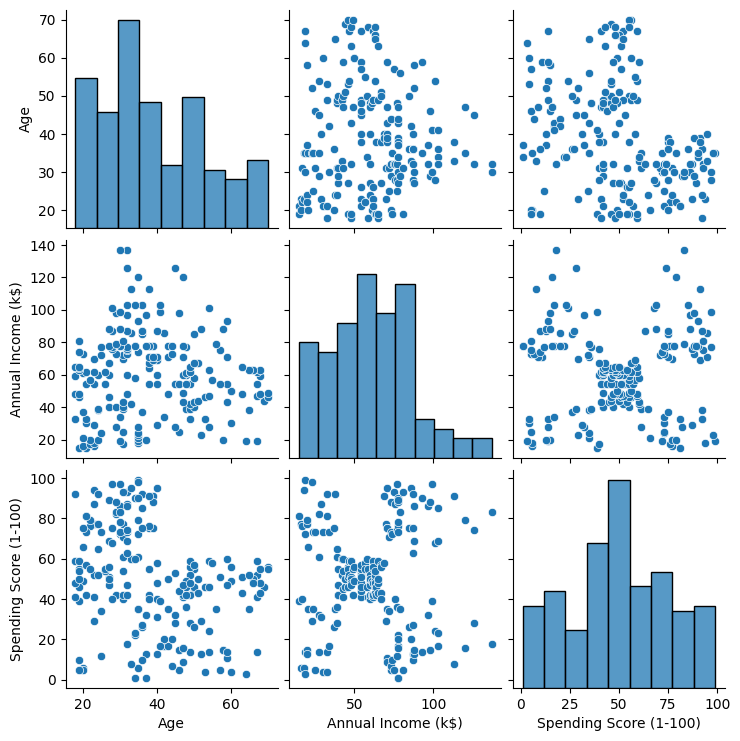

In [ ]:
import seaborn as sns
#Plot Genre,Age, Income and Spending Score Correlation
# sns.pairplot(df[['Genre','Age','Annual Income (k$)', 'Spending Score (1-100)']])
sns.pairplot(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# # Apply normalization
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# print(df.head())


In [ ]:
df.drop(['CustomerID','Genre','Age'], axis=1, inplace=True)

In [ ]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Elbow method

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

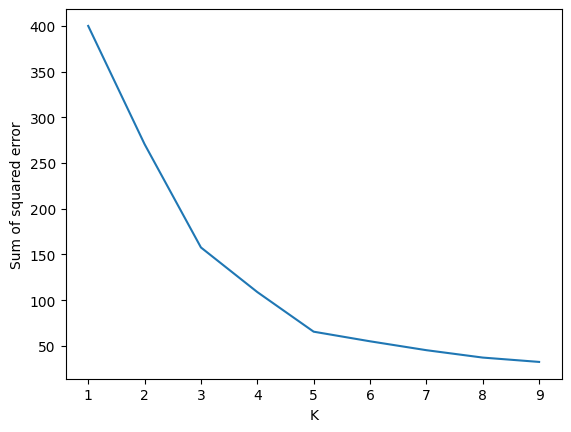

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Building the final model

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_pred = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['Cluster'] = y_pred

In [ ]:
df

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
5,-1.662660,1.001596,4
6,-1.624491,-1.715913,0
7,-1.624491,1.700384,4
8,-1.586321,-1.832378,0
9,-1.586321,0.846310,4


### Exploring the created clusters

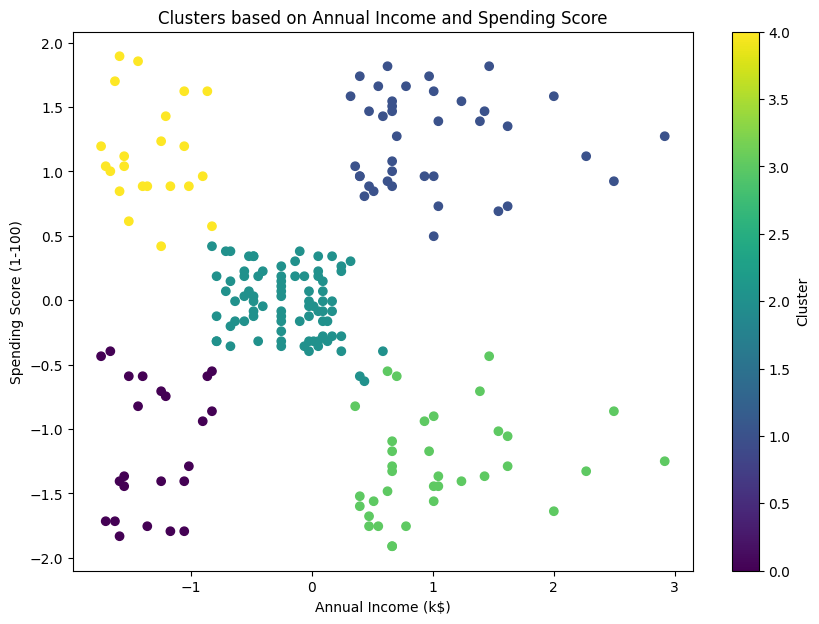

In [ ]:

import matplotlib.pyplot as plt

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))

# Plot data points with color based on their cluster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', marker='o')

# Set labels
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Add title
plt.title('Clusters based on Annual Income and Spending Score')

# Add color bar
plt.colorbar(label='Cluster')

# Show plot
plt.show()


# Hierarchical_Clustering

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the datasets

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Genre'] = label_encoder.fit_transform(df['Genre'])

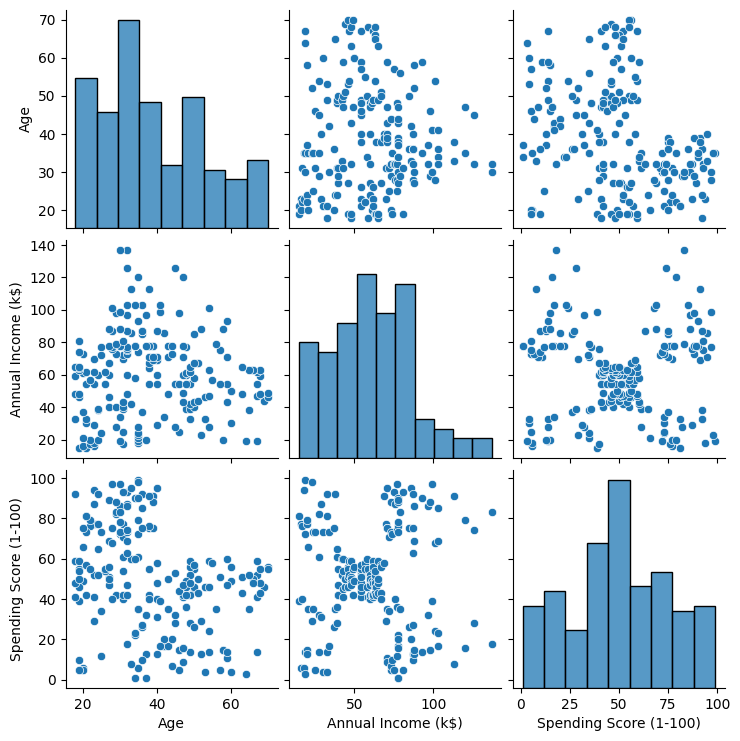

In [ ]:
import seaborn as sns
# Plot Genre,Age, Income and Spending Score Correlation
# sns.pairplot(df[['Genre','Age','Annual Income (k$)', 'Spending Score (1-100)']])
sns.pairplot(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Feature scaling

In [ ]:
df.drop(['CustomerID','Genre','Age'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# # Apply normalization
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# print(df.head())


In [ ]:
df

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Text(0, 0.5, 'Euclidean distance')

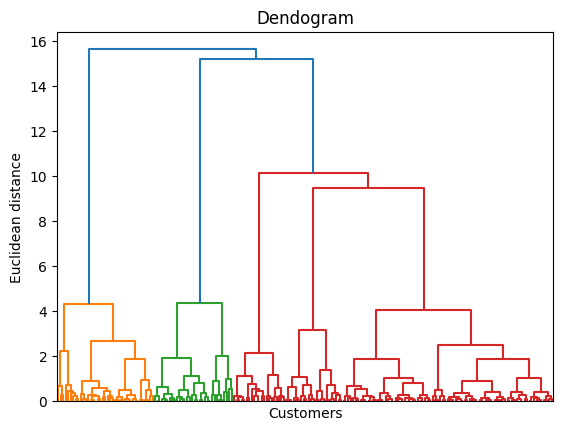

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
hc.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

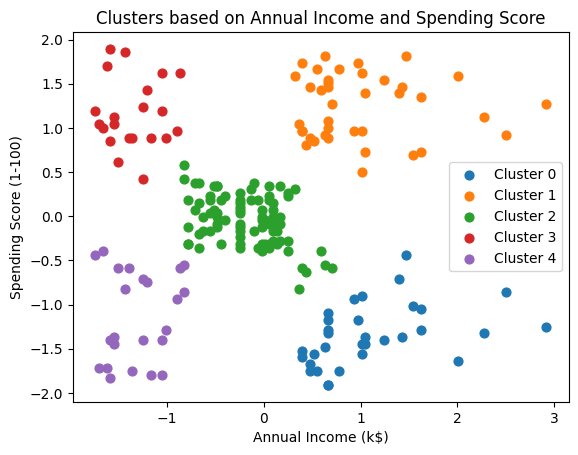

In [ ]:
import matplotlib.pyplot as plt

# Assuming hc.labels_ contains the cluster labels and df is your DataFrame
# Here, df[['Annual Income (k$)', 'Spending Score (1-100)']] is used as the 2D data
for i in range(len(set(hc.labels_))):  # or range(hc.n_clusters_) if you have the number of clusters
    plt.scatter(
        df[hc.labels_ == i]['Annual Income (k$)'],
        df[hc.labels_ == i]['Spending Score (1-100)'],
        s=40,
        label='Cluster ' + str(i)
    )

plt.title('Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
